In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## 5.1 < z < 5.3

In [363]:
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40'
target_files = ["a=0.1644", "a=0.1615", "a=0.1593", "a=0.1590", "a=0.1588"]
res_file = "avgflux.x50.res"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)


C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1644\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1615\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1593\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1590\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1588\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\B\a=0.1644\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\B\a=0.1615\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\B\a=0.1593\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\B\a=0.1590\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\B\a=0.1588\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1644\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1615\avgflux.x50.res
C:\Users\eawer\Downloads\C40

In [364]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)

In [365]:
z = z.transpose()
z

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
tau,0.2083,0.1903,0.2659,0.1518,0.1686,0.1588,0.1902,0.2044,0.2462,0.1911,...,0.06348,0.0876,0.08293,0.05774,0.09763,0.09114,0.1358,0.05196,0.07909,0.06845


In [366]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)] #splits 'z' into segments of 10 columns each

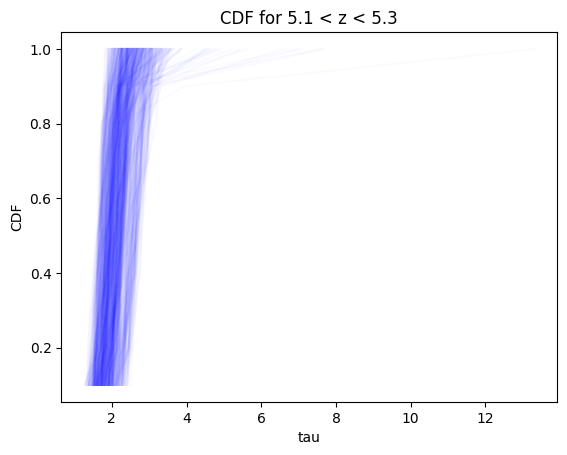

In [123]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.title("CDF for 5.1 < z < 5.3")
plt.show()

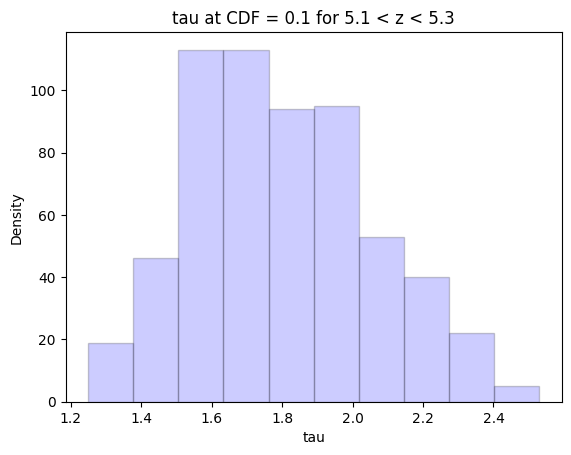

In [133]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.1 for 5.1 < z < 5.3')
plt.show()

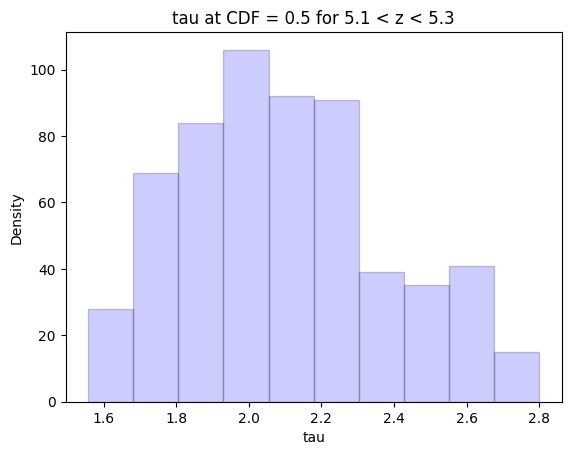

In [134]:
tau_5 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_5 = np.abs(np.array(one) - 0.5).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_5_value = tau_sort[index_5]
    tau_5.append(tau_5_value)

plt.hist(tau_5, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.5 for 5.1 < z < 5.3')
plt.show()

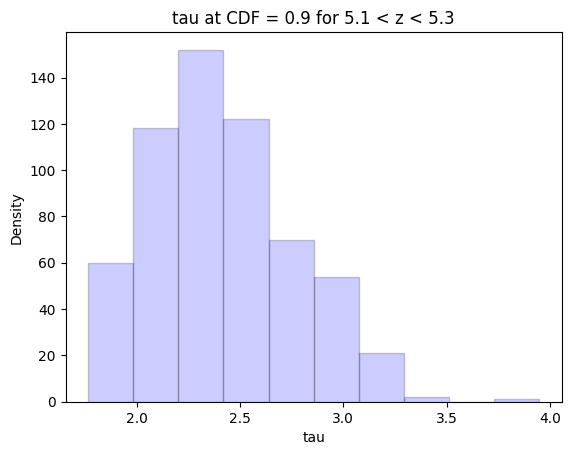

In [135]:
tau_9 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_9 = np.abs(np.array(one) - 0.9).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_9_value = tau_sort[index_9]
    tau_9.append(tau_9_value)

plt.hist(tau_9, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.9 for 5.1 < z < 5.3')
plt.show()

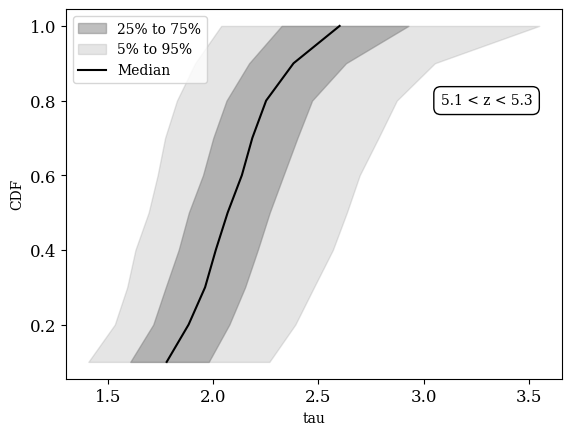

In [370]:
# quantized cdf vs. tau graph
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
q50_arr = []
q5_arr = []
q95_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q50 = np.quantile(tau_1, .5)
    q5 = np.quantile(tau_1,.05)
    q95 = np.quantile(tau_1,.95)
    q50_arr.append(q50)
    q25_arr.append(q25)
    q75_arr.append(q75)
    q5_arr.append(q5)
    q95_arr.append(q95)
plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'5.1 < z < 5.3' 
plt.annotate(combined_annotation, xy=(3.3, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
plt.plot(q50_arr,one,label='Median',color='black')
plt.legend(loc='upper left')
plt.show() 

## 5.3 < z < 5.5

In [371]:
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80'
target_files = ["a=0.1541", "a=0.1569","a=0.1587","a=0.1569", "a=0.1544", "a=0.1569"]
res_file = "avgflux.x50.res"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1541\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1569\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1587\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1569\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1544\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1569\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1541\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1569\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1587\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1569\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1544\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1569\avgflux.x50.res
C:\Users\eawer\Downloads\C80

In [372]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)
z = z.transpose()

In [373]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)] #splits 'z' into segments of 10 columns each

C:\Users\eawer\AppData\Local\Temp\ipykernel_13520\843703837.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


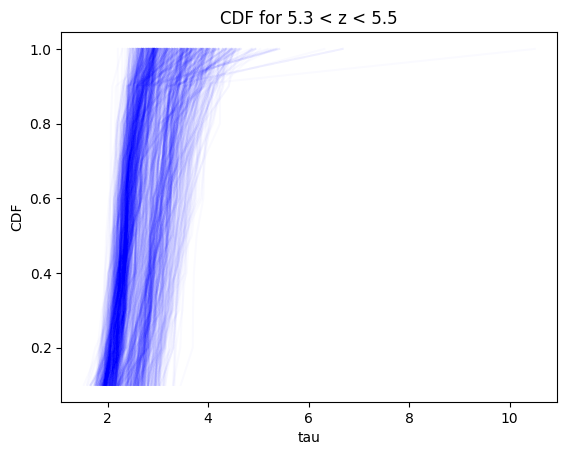

In [188]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.title("CDF for 5.3 < z < 5.5")
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_13520\2510694354.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


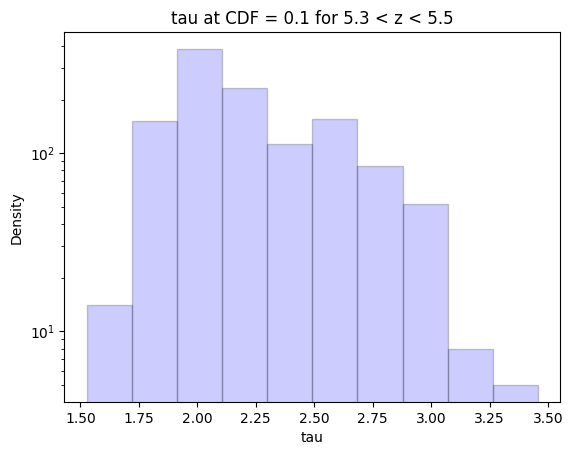

In [190]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.yscale('log')
plt.title('tau at CDF = 0.1 for 5.3 < z < 5.5')
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_13520\2580934151.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


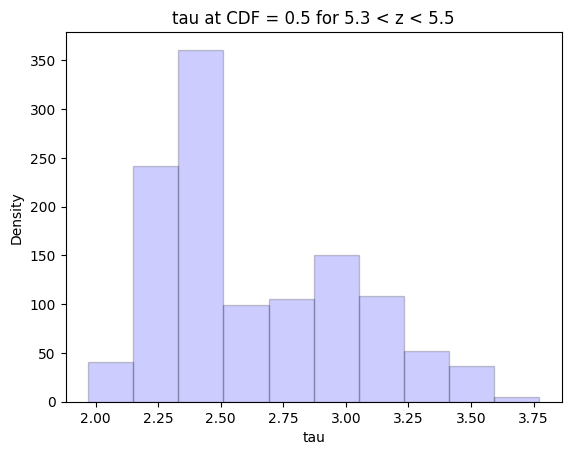

In [149]:
tau_5 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_5 = np.abs(np.array(one) - 0.5).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_5_value = tau_sort[index_5]
    tau_5.append(tau_5_value)

plt.hist(tau_5, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.5 for 5.3 < z < 5.5')
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_13520\666783130.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


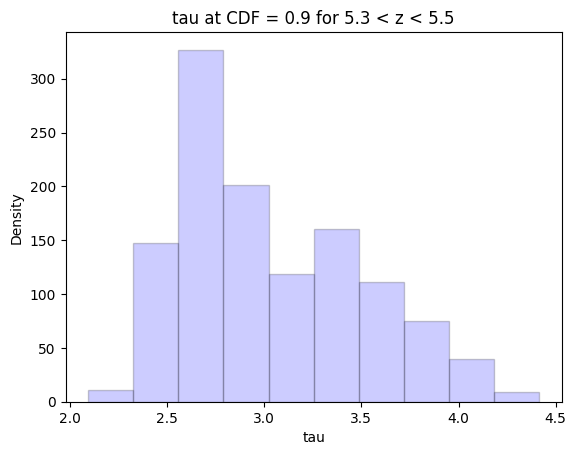

In [150]:
tau_9 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_9 = np.abs(np.array(one) - 0.9).argmin()
    tau_9_value = tau_sort[index_9]
    tau_9.append(tau_9_value)

plt.hist(tau_9, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.9 for 5.3 < z < 5.5')
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\1705708710.py:13: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


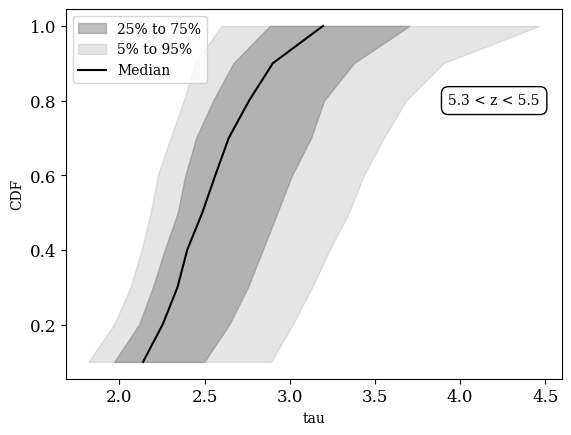

In [376]:
# quantized cdf vs. tau graph
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
q50_arr = []
q5_arr = []
q95_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q50 = np.quantile(tau_1, .5)
    q5 = np.quantile(tau_1,.05)
    q95 = np.quantile(tau_1,.95)
    q50_arr.append(q50)
    q25_arr.append(q25)
    q75_arr.append(q75)
    q5_arr.append(q5)
    q95_arr.append(q95)
plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'5.3 < z < 5.5' 
plt.annotate(combined_annotation, xy=(4.2, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
plt.plot(q50_arr,one,label='Median',color='black')
plt.legend(loc='upper left')
plt.show() 

## 5.5 < z < 5.7 

In [377]:
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80'
target_files = ["a=0.1497", "a=0.1523", "a=0.1499", "a=0.1518", "a=0.1538", "a=0.1497", "a=0.1521"]
res_file = "avgflux.x50.res"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1497\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1523\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1499\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1518\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1538\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1497\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1521\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1497\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1523\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1499\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1518\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1538\avgflux.x50.res
C:\Users\eawer\Downloads\C80

In [378]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)
z = z.transpose()

In [379]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)]

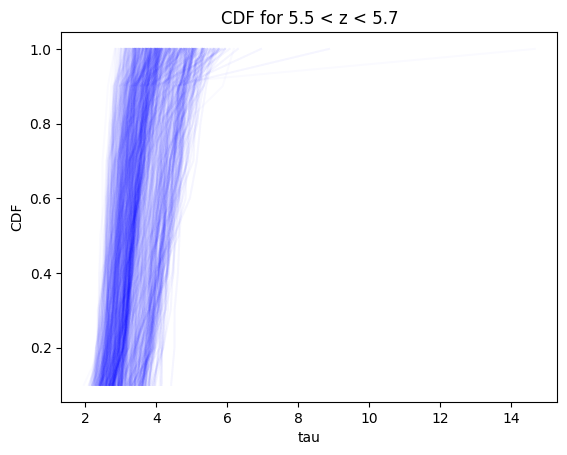

In [160]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.title("CDF for 5.5 < z < 5.7")
plt.show()

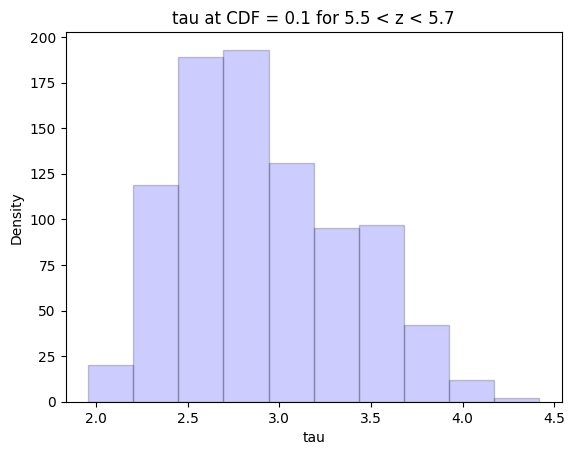

In [161]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.1 for 5.5 < z < 5.7')
plt.show()

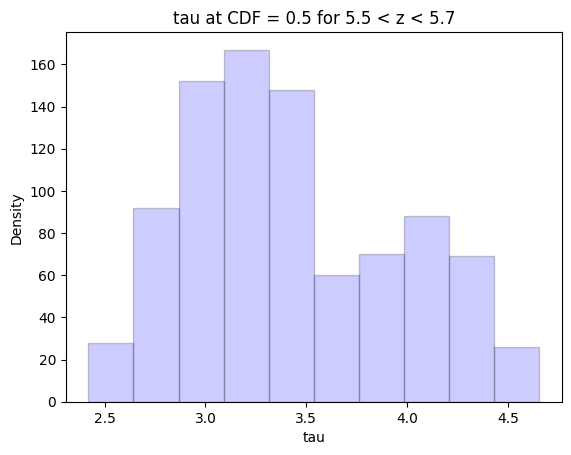

In [162]:
tau_5 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_5 = np.abs(np.array(one) - 0.5).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_5_value = tau_sort[index_5]
    tau_5.append(tau_5_value)

plt.hist(tau_5, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.5 for 5.5 < z < 5.7')
plt.show()

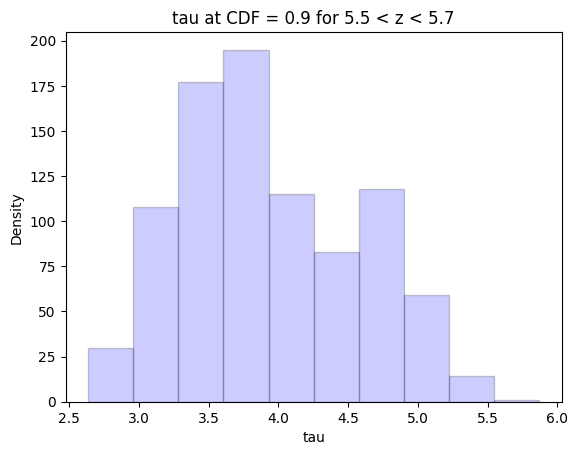

In [163]:
tau_9 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_9 = np.abs(np.array(one) - 0.9).argmin()
    tau_9_value = tau_sort[index_9]
    tau_9.append(tau_9_value)

plt.hist(tau_9, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.9 for 5.5 < z < 5.7')
plt.show()

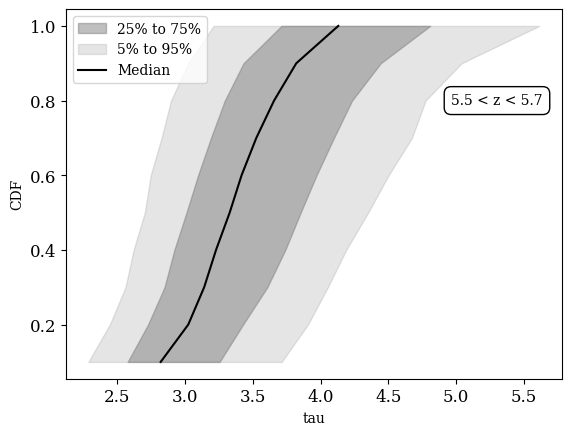

In [382]:
# quantized cdf vs. tau graph
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
q50_arr = []
q5_arr = []
q95_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q50 = np.quantile(tau_1, .5)
    q5 = np.quantile(tau_1,.05)
    q95 = np.quantile(tau_1,.95)
    q50_arr.append(q50)
    q25_arr.append(q25)
    q75_arr.append(q75)
    q5_arr.append(q5)
    q95_arr.append(q95)
plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'5.5 < z < 5.7' 
plt.annotate(combined_annotation, xy=(5.3, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
plt.plot(q50_arr,one,label='Median',color='black')
plt.legend(loc='upper left')
plt.show() 

## 5.7 < z < 5.9

In [383]:
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80'
target_files = ["a=0.1455", "a=0.1472", "a=0.1451", "a=0.1479", "a=0.1452", "a=0.1474"]
res_file = "avgflux.x50.res"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1455\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1472\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1451\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1479\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1452\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1474\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1455\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1472\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1451\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1479\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1452\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1474\avgflux.x50.res
C:\Users\eawer\Downloads\C80

In [384]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)
z = z.transpose()

In [385]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)]

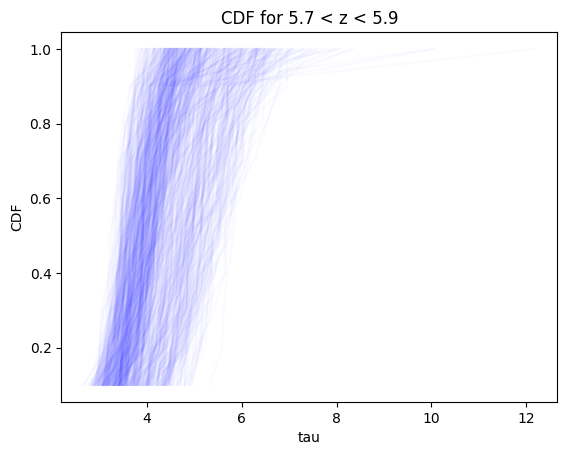

In [167]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.title("CDF for 5.7 < z < 5.9")
plt.show()

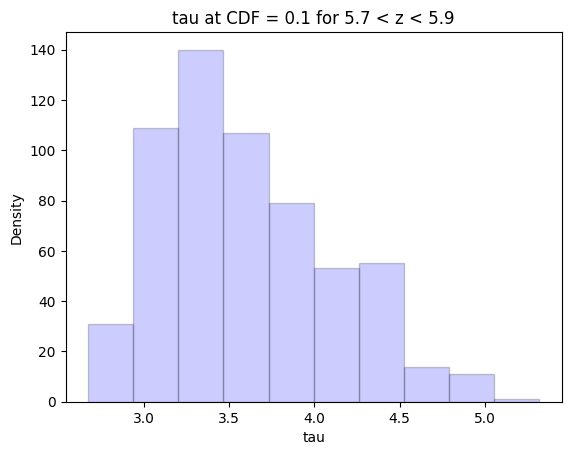

In [170]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.1 for 5.7 < z < 5.9')
plt.show()
#10% of the tau values are these values listed below

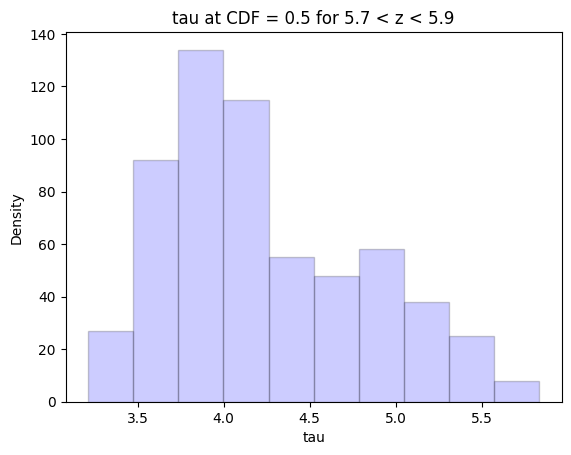

In [171]:
tau_5 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_5 = np.abs(np.array(one) - 0.5).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_5_value = tau_sort[index_5]
    tau_5.append(tau_5_value)

plt.hist(tau_5, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.5 for 5.7 < z < 5.9')
plt.show()

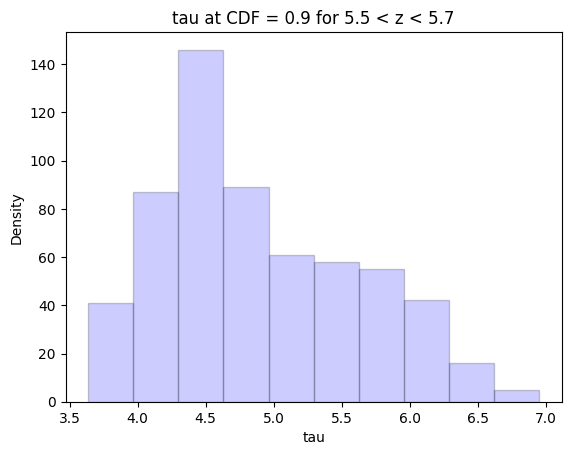

In [172]:
tau_9 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_9 = np.abs(np.array(one) - 0.9).argmin()
    tau_9_value = tau_sort[index_9]
    tau_9.append(tau_9_value)

plt.hist(tau_9, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.9 for 5.5 < z < 5.7')
plt.show()

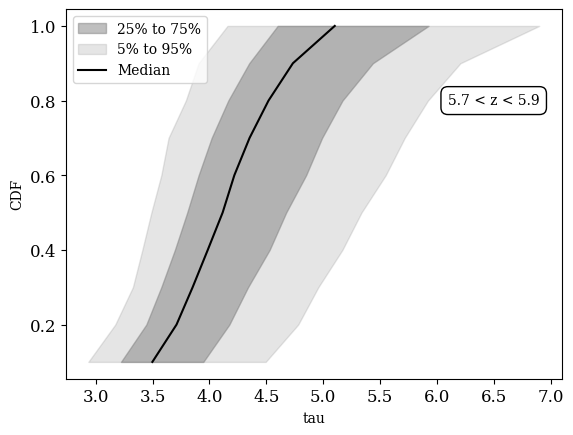

In [388]:
# quantized cdf vs. tau graph
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
q50_arr = []
q5_arr = []
q95_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q50 = np.quantile(tau_1, .5)
    q5 = np.quantile(tau_1,.05)
    q95 = np.quantile(tau_1,.95)
    q50_arr.append(q50)
    q25_arr.append(q25)
    q75_arr.append(q75)
    q5_arr.append(q5)
    q95_arr.append(q95)
plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'5.7 < z < 5.9' 
plt.annotate(combined_annotation, xy=(6.5, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
plt.plot(q50_arr,one,label='Median',color='black')
plt.legend(loc='upper left')
plt.show() 

## 5.9 < z < 6.1 

In [389]:
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80'
target_files = ["a=0.1409", "a=0.1428", "a=0.1433", "a=0.1430"]
res_file = "avgflux.x50.res"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1409\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1428\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1433\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\A\a=0.1430\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1409\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1428\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1433\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\B\a=0.1430\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\C\a=0.1409\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\C\a=0.1428\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\C\a=0.1433\avgflux.x50.res
C:\Users\eawer\Downloads\C80-20240512T195631Z-001/C80\C\a=0.1430\avgflux.x50.res


In [390]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)
z = z.transpose()

In [391]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)]

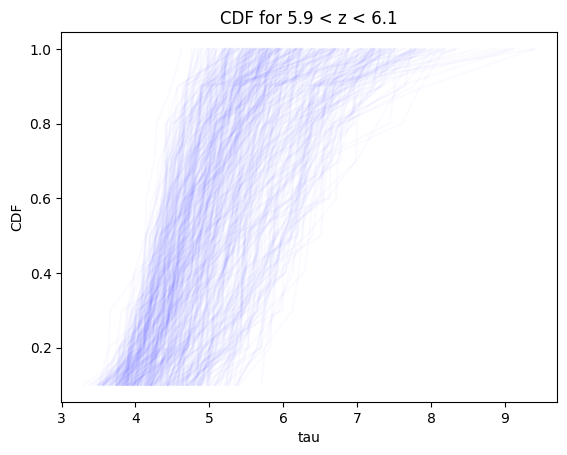

In [183]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.title("CDF for 5.9 < z < 6.1")
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_13520\1765108370.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


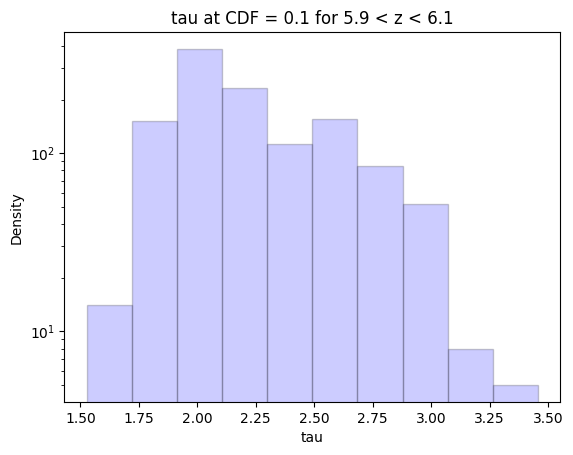

In [189]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.yscale('log')
plt.title('tau at CDF = 0.1 for 5.9 < z < 6.1')
plt.show()

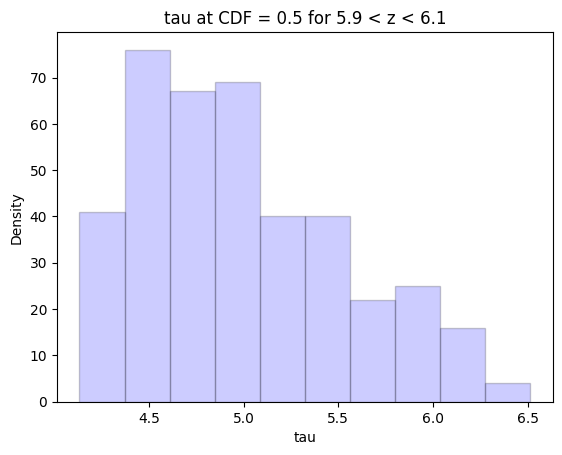

In [181]:
tau_5 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_5 = np.abs(np.array(one) - 0.5).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_5_value = tau_sort[index_5]
    tau_5.append(tau_5_value)

plt.hist(tau_5, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.5 for 5.9 < z < 6.1')
plt.show()

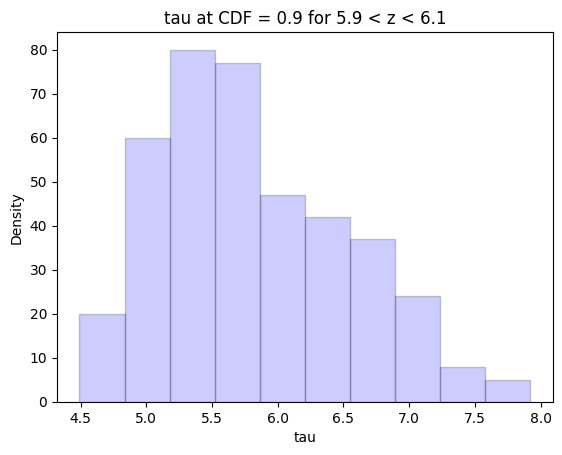

In [182]:
tau_9 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_9 = np.abs(np.array(one) - 0.9).argmin()
    tau_9_value = tau_sort[index_9]
    tau_9.append(tau_9_value)

plt.hist(tau_9, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.9 for 5.9 < z < 6.1')
plt.show()

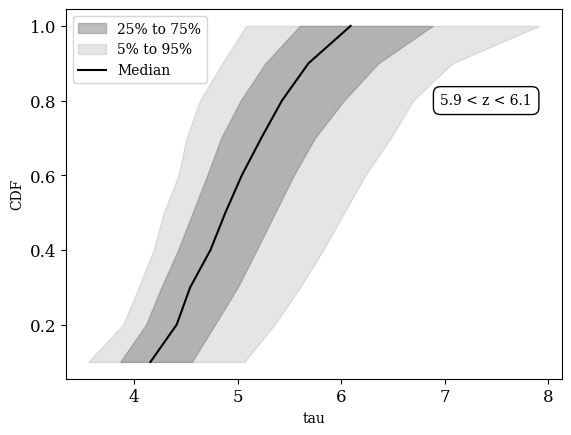

In [396]:
# quantized cdf vs. tau graph
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
q50_arr = []
q5_arr = []
q95_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q50 = np.quantile(tau_1, .5)
    q5 = np.quantile(tau_1,.05)
    q95 = np.quantile(tau_1,.95)
    q50_arr.append(q50)
    q25_arr.append(q25)
    q75_arr.append(q75)
    q5_arr.append(q5)
    q95_arr.append(q95)
plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'5.9 < z < 6.1' 
plt.annotate(combined_annotation, xy=(7.4, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
plt.plot(q50_arr,one,label='Median',color='black')
plt.legend(loc='upper left')
plt.show() 

## Experimenting with z = 5.08

In [93]:
#Experimenting with z = 5.08
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40'
target_files = ["a=0.1644"]
res_file = "avgflux.x50.res"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1644\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\B\a=0.1644\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1644\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\F\a=0.1644\avgflux.x50.res


In [94]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)

In [95]:
z = z.transpose()
z

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
tau,0.2083,0.1903,0.2659,0.1518,0.1686,0.1588,0.1902,0.2044,0.2462,0.1911,...,0.1754,0.1723,0.1088,0.1631,0.1735,0.1809,0.168,0.1051,0.1599,0.2334


In [96]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)]

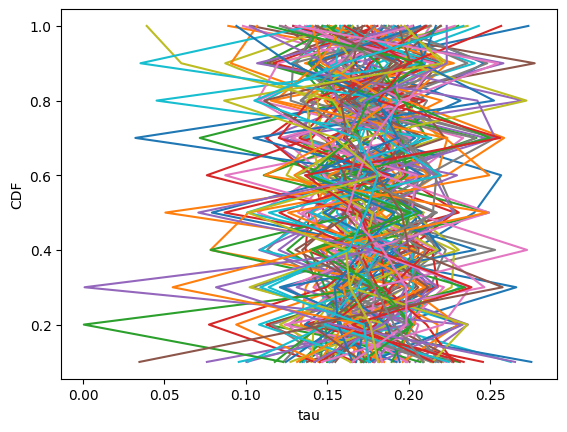

In [97]:
one = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in df:
    first_row = i.iloc[0]
    plt.plot(first_row, one)
plt.xlabel('tau')
plt.ylabel('CDF')
plt.show()
#Since the CDF is the fraction on sightlines with tau above some threshold, you should sort first_row by increasing tau, where tau=-log(F)

In [98]:
import pandas as pd

# Assuming df is your DataFrame
df[1] = df[1].transpose()  # Transpose the DataFrame if it's not already in the desired orientation
df[1] = df[1].sort_values(by='tau')  # Sort by the 'tau' column
df[1] = df[1].transpose()  # Transpose back to the original orientation if needed
df[1]

,19,12,16,13,10,15,11,17,14,18
tau,0.08916,0.1414,0.1518,0.1575,0.1837,0.1842,0.1885,0.19,0.1901,0.2182


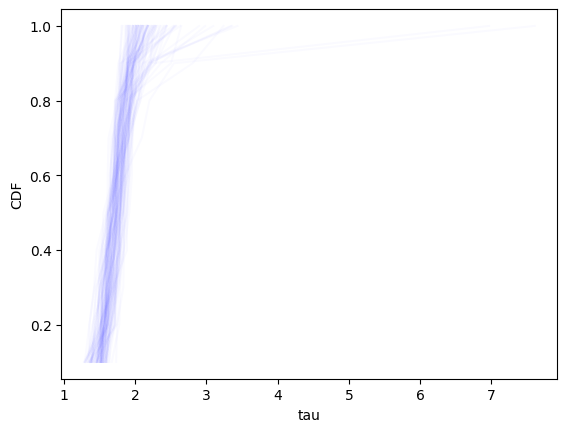

In [99]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0] 
    #first_row = first_row.sort_values()  
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.show()


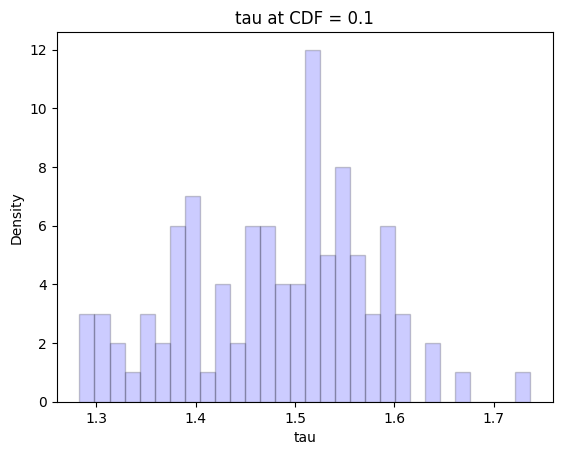

In [110]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=30, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.1')
plt.show()

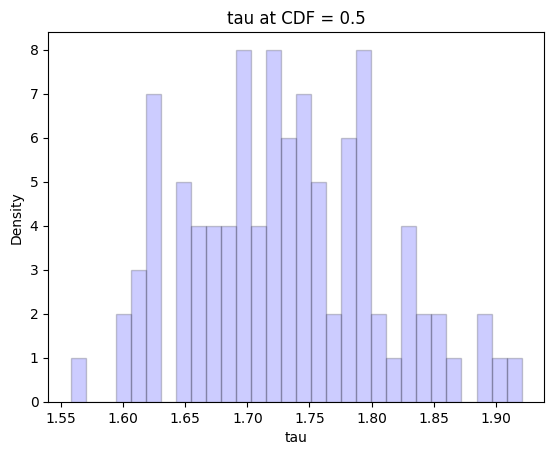

In [111]:
tau_5 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_5 = np.abs(np.array(one) - 0.5).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_5_value = tau_sort[index_5]
    tau_5.append(tau_5_value)

plt.hist(tau_5, bins=30, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.5')
plt.show()

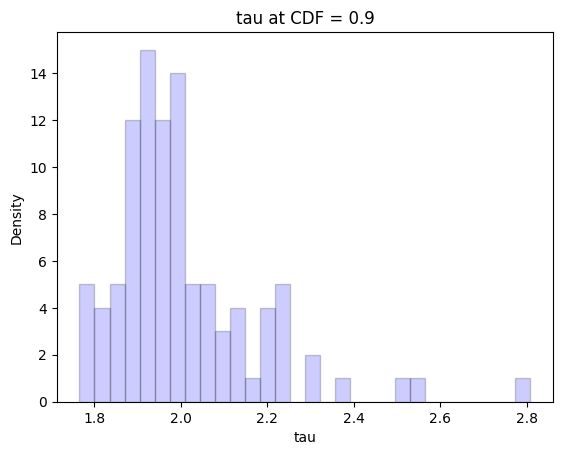

In [112]:
tau_9 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    # Find the index where the CDF is closest to 0.5
    index_9 = np.abs(np.array(one) - 0.9).argmin()
    # Extract the optical depth at the index closest to CDF = 0.5
    tau_9_value = tau_sort[index_9]
    tau_9.append(tau_9_value)

plt.hist(tau_9, bins=30, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('tau at CDF = 0.9')
plt.show()

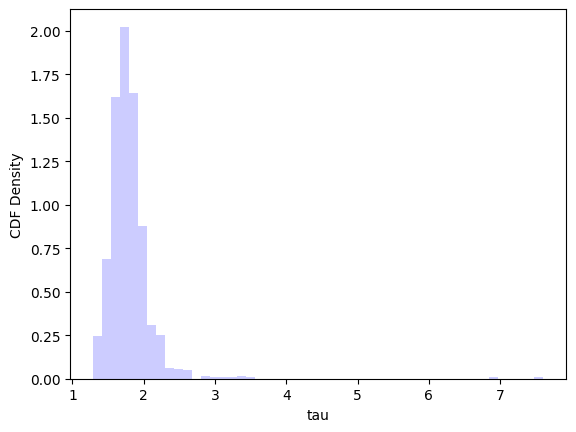

In [103]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
all_tau_values = []

for i in df:
    first_row = i.iloc[0]   
    tau = -np.log(np.array(first_row))
    all_tau_values.extend(tau) 

all_tau_values = np.array(all_tau_values)

plt.hist(all_tau_values, bins=50, density=True, alpha=0.2, color='blue')
plt.xlabel('tau')
plt.ylabel('CDF Density')
plt.show()

## Snapshot of z = 5.19 (a = .1615)

In [315]:
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40'
target_files = ["a=0.1615"]
res_file = "avgflux.x50.res"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1615\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\B\a=0.1615\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1615\avgflux.x50.res
C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\F\a=0.1615\avgflux.x50.res


In [316]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)

In [317]:
z = z.transpose()

In [318]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)]

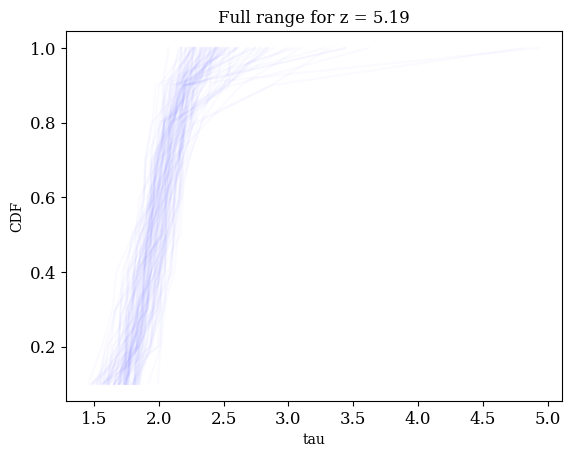

In [277]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0]  
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.title('Full range for z = 5.19')
plt.show()

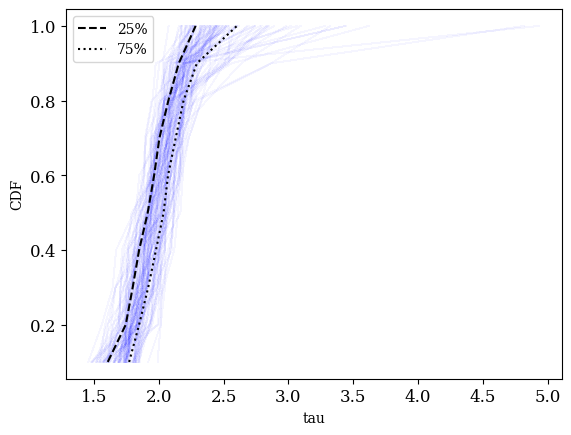

In [338]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        plt.plot(tau_sort, one,color='blue',alpha = .002)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
#trying to iterate through the dataframe, and for every value of flux in the df, convert it to tau, and then sort those
#values of tau, and plot them against 'one'
#using these values of tau_sort, iterate through it and create a new array where every index of one matches an element
#of tau_sort, then in the new tau_1 array, calculate the quantiles of .25 and .75, and then plot these two lines
#with the original data from tau_sort over it
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q25_arr.append(q25)
    q75_arr.append(q75)
    
    
#tau_sort_25 = tau_1[tau_1 <= q25]
#tau_sort_75 = tau_1[tau_1 >= q75]
#tau_sort_25 = np.sort(tau_sort_25)
#tau_sort_75 = np.sort(tau_sort_75)
#one_25 = np.linspace(0, 1, len(tau_sort_25)) 
#one_75 = np.linspace(0, 1, len(tau_sort_75))

plt.plot(q25_arr, one, linestyle='--', label='25%',color='black')
plt.plot(q75_arr, one, linestyle='dotted', label='75%',color='black')
plt.xlabel('tau')
plt.ylabel('CDF')
plt.legend()
plt.show()

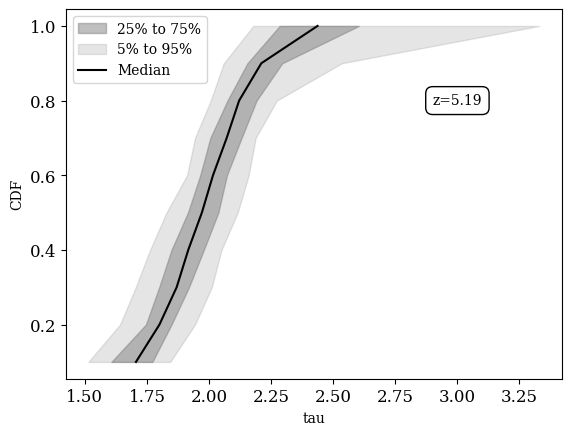

In [356]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
q50_arr = []
q5_arr = []
q95_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q50 = np.quantile(tau_1, .5)
    q5 = np.quantile(tau_1,.05)
    q95 = np.quantile(tau_1,.95)
    q50_arr.append(q50)
    q25_arr.append(q25)
    q75_arr.append(q75)
    q5_arr.append(q5)
    q95_arr.append(q95)
    
#plt.plot(q25_arr, one, linestyle='--', label='25%',color='black')
#plt.plot(q75_arr, one, linestyle='dotted', label='75%',color='black')
plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.19' 
plt.annotate(combined_annotation, xy=(3, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
plt.plot(q50_arr,one,label='Median',color='black')
plt.legend(loc='upper left')
plt.show() 

## Graph for a = 0.155/z=5.45

In [357]:
all_dataframes = []
directory = r'C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40'
target_files = ["a=0.1557","a=0.1552","a=0.1559"]
res_file = "avgflux.x50.resL6"

for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
        for file_name in target_files:
            file_path = os.path.join(subdir_path, file_name, res_file)
            print(file_path)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, delimiter=' ') 
                all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\A\a=0.1557\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\A\a=0.1552\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\A\a=0.1559\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\B\a=0.1557\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\B\a=0.1552\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\B\a=0.1559\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\C\a=0.1557\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\C\a=0.1552\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\C\a=0.1559\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\F\a=0.1557\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\F\a=0.1552\avgflux.x50.resL6
C:\Users\eawer\Downloads\C40-20240613T140534Z-001/C40\F\a=0.1559\avgflux.x50.resL6


In [358]:
z = combined_df
z.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
z.drop(columns=['km_per_s'],inplace=True)
z.drop(columns=['length'],inplace=True)
z = z.transpose()

In [359]:
df = [z.iloc[:, i:i+10] for i in range(0, z.shape[1], 10)]

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\261826464.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


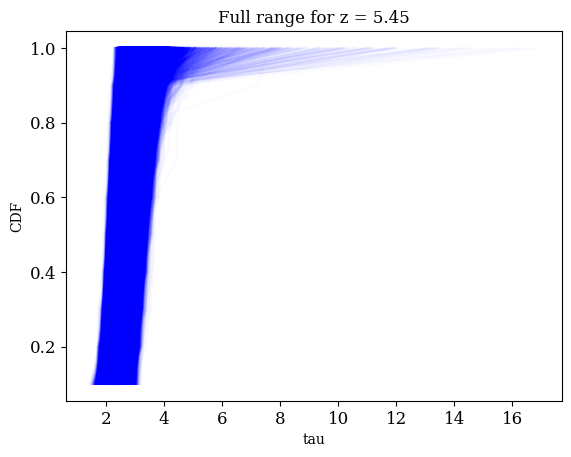

In [124]:
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
for i in df:
    first_row = i.iloc[0]  
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    plt.plot(tau_sort, one,color='blue',alpha = .02)

plt.xlabel('tau')
plt.ylabel('CDF')
plt.title('Full range for z = 5.45')
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\3705129662.py:13: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


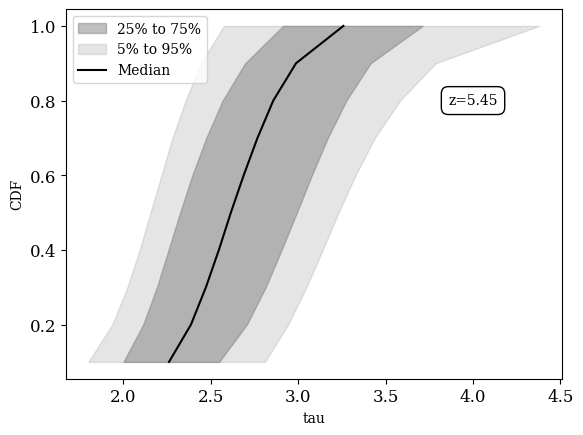

In [362]:
# quantized cdf vs. tau graph
one = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
q25_arr = []
q75_arr = []
q50_arr = []
q5_arr = []
q95_arr = []
for i in range(len(one)):
    tau_1 = []
    index_1 = np.abs(np.array(one)-one[i]).argmin()
    for j in df:
        first_row = j.iloc[0]
        tau = -np.log(np.array(first_row))
        tau_sort = np.sort(tau)
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    q25 = np.quantile(tau_1, .25)
    q75 = np.quantile(tau_1, .75)
    q50 = np.quantile(tau_1, .5)
    q5 = np.quantile(tau_1,.05)
    q95 = np.quantile(tau_1,.95)
    q50_arr.append(q50)
    q25_arr.append(q25)
    q75_arr.append(q75)
    q5_arr.append(q5)
    q95_arr.append(q95)
plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5,label='25% to 75%')
plt.fill_betweenx(one,q5_arr,q95_arr,color='gray',alpha=.2,label='5% to 95%')
plt.xlabel('tau')
plt.ylabel('CDF')
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation, xy=(4, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
plt.plot(q50_arr,one,label='Median',color='black')
plt.legend(loc='upper left')
plt.show() 

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\1364624080.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


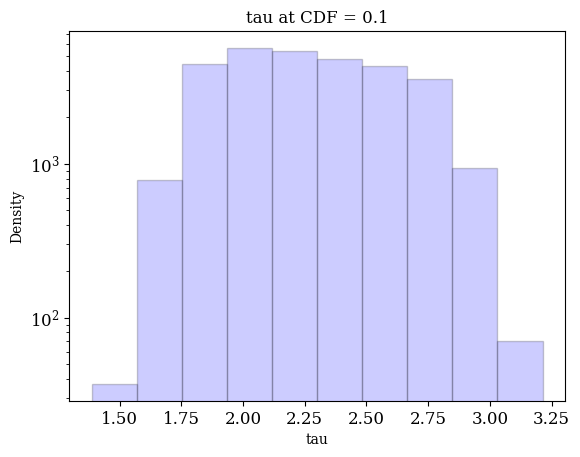

2.276589388557039
0.10578018112271356


In [55]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.yscale('log')
plt.title('tau at CDF = 0.1')
plt.show()
print(np.mean(tau_1))
print(np.var(tau_1))

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\1951280217.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


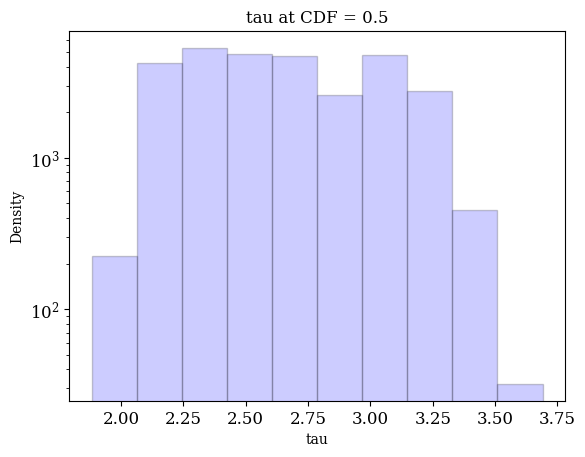

2.6558701747415365 0.12920838493891731


In [56]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.5).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.yscale('log')
plt.title('tau at CDF = 0.5')
plt.show()
mean = np.mean(tau_1)
var = np.var(tau_1)
print(mean,var)

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\2076064733.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


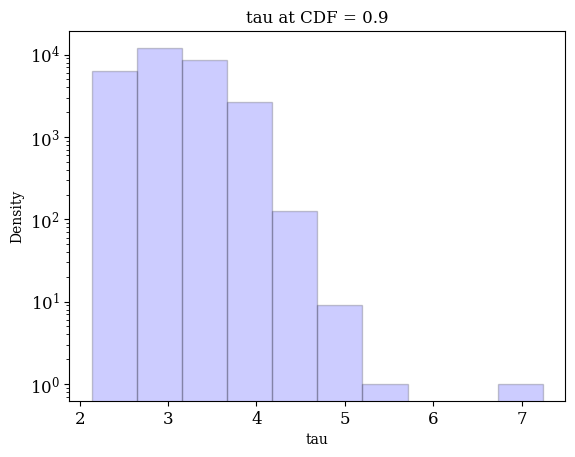

3.055160170932583
0.19077877850935257


In [57]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.9).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.yscale('log')
plt.title('tau at CDF = 0.9')
plt.show()
#mean and variance
print(np.mean(tau_1))
print(np.var(tau_1))
#normalize histogram divide by 10k
#overplot the gaussian

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\4099091362.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


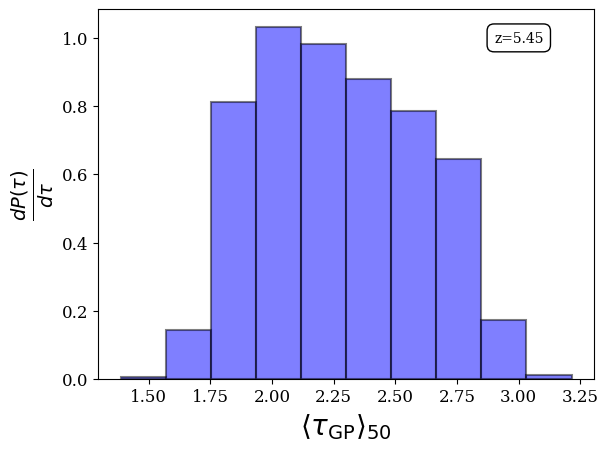

In [58]:
#linear, normalized, cdf = .1
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 

plt.annotate(combined_annotation, xy=(3, 1),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
tau_1 = np.array(tau_1)
plt.hist(tau_1, bins=10, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)

plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\596601317.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


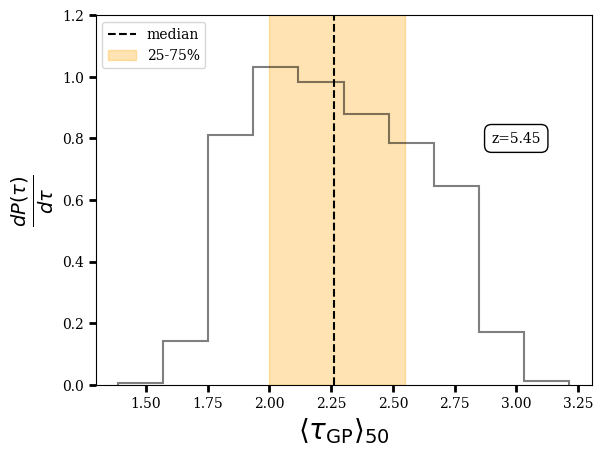

In [82]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.tick_params(axis='both', which='both', length=5, width=2, labelsize=10)

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation, xy=(3, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')

tau_1 = np.array(tau_1)

q25 = np.quantile(tau_1, 0.25)
q50 = np.quantile(tau_1, 0.50)
q75 = np.quantile(tau_1, 0.75)

n, bins, patches = plt.hist(tau_1, bins=10, density=True, histtype='step', color='blue', alpha=0.5,edgecolor='black', linewidth=1.5)
plt.axvline(np.median(tau_1),linestyle='--',color='black',label='median')
min_tau = np.min(tau_1)
max_tau = np.max(tau_1)

plt.fill_betweenx([0, max(n)+.3], q25, q75, color='orange', alpha=0.3, label='25-75%')
plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.legend(loc='upper left')
plt.ylim([0,1.2])
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\662262555.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


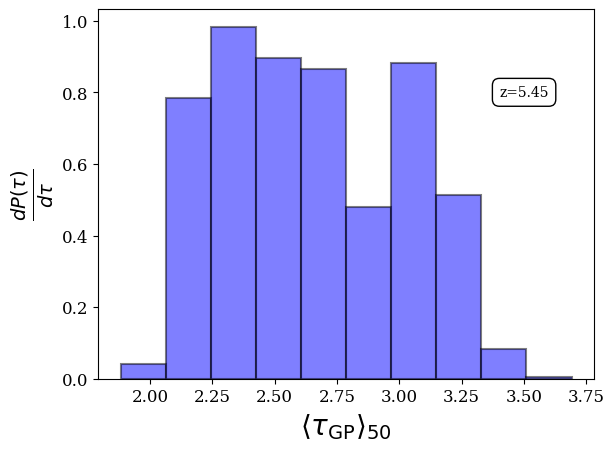

In [59]:
#linear, normalized, cdf = .5
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.5).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 

plt.annotate(combined_annotation, xy=(3.5, .8), 
             bbox=bbox_props, ha='center', va='center')
tau_1 = np.array(tau_1)
plt.hist(tau_1, bins=10, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)

plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\3972244789.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


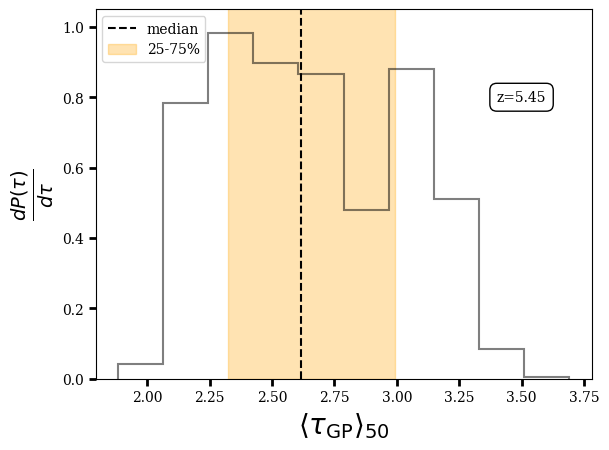

In [85]:
#linear, normalized, cdf = .5, quantizied
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.5).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.tick_params(axis='both', which='both', length=5, width=2, labelsize=10)

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation, xy=(3.5, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')

tau_1 = np.array(tau_1)

q25 = np.quantile(tau_1, 0.25)
q75 = np.quantile(tau_1, 0.75)

n, bins, patches = plt.hist(tau_1, bins=10, density=True, histtype='step', color='blue', alpha=0.5,edgecolor='black', linewidth=1.5)
plt.axvline(np.median(tau_1),linestyle='--',color='black',label='median')
min_tau = np.min(tau_1)
max_tau = np.max(tau_1)

plt.fill_betweenx([0, max(n)+.3], q25, q75, color='orange', alpha=0.3, label='25-75%')


plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.legend(loc='upper left')
plt.ylim([0,1.05])
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\1245528582.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


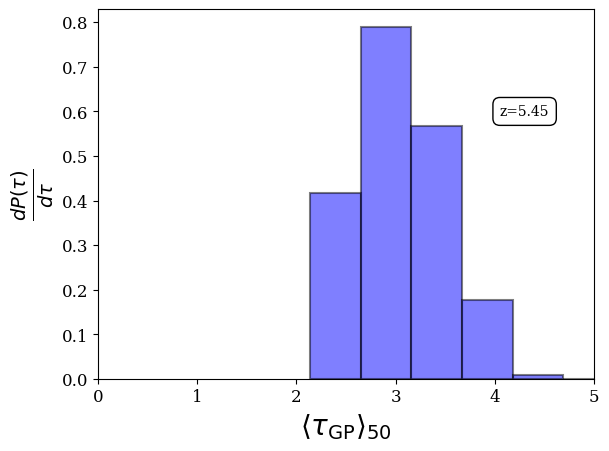

In [60]:
#linear, normalized, cdf = .9
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.9).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 

plt.annotate(combined_annotation, xy=(4.3, .6), 
             bbox=bbox_props, ha='center', va='center')
tau_1 = np.array(tau_1)
plt.hist(tau_1, bins=10, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)
plt.xlim([0,5])
plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\667310994.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


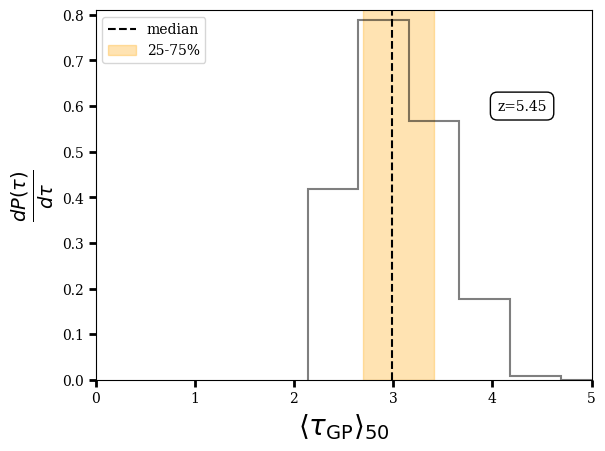

2.69573880044603


In [123]:
#linear, normalized, cdf = .9, quantizied
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.9).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.tick_params(axis='both', which='both', length=5, width=2, labelsize=10)

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation, xy=(4.3, .6),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')

tau_1 = np.array(tau_1)

q25 = np.quantile(tau_1, 0.25)
q75 = np.quantile(tau_1, 0.75)

n, bins, patches = plt.hist(tau_1, bins=10, density=True, histtype='step', color='blue', alpha=0.5,edgecolor='black', linewidth=1.5)
plt.axvline(np.median(tau_1),linestyle='--',color='black',label='median')
min_tau = np.min(tau_1)
max_tau = np.max(tau_1)

plt.fill_betweenx([0, max(n)+.3], q25, q75, color='orange', alpha=0.3, label='25-75%')


plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.legend(loc='upper left')
plt.ylim([0,.81])
plt.xlim([0,5])
plt.show()
print(q25)

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\2255306165.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


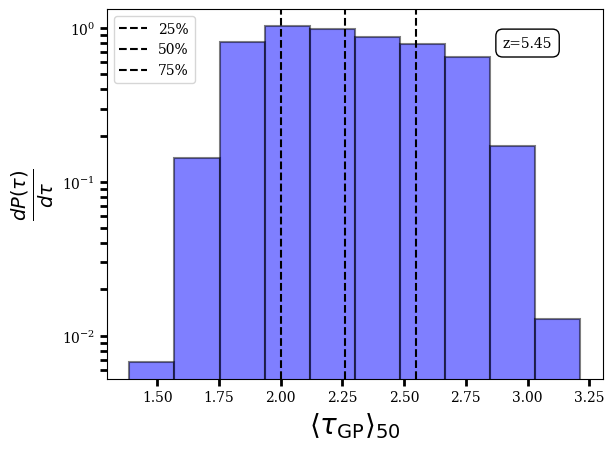

In [61]:
#log, normalized, cdf = .1
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.tick_params(axis='both', which='both', length=5, width=2, labelsize=10)
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation, xy=(3, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')
tau_1 = np.array(tau_1)
plt.hist(tau_1, bins=10, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)
plt.axvline(x=np.quantile(tau_1,.25),color = 'black',linestyle='--',label='25%')
plt.axvline(x=np.quantile(tau_1,.50),color='black',linestyle='--',label='50%')
plt.axvline(x=np.quantile(tau_1,.75),color='black',linestyle='--',label='75%')
plt.yscale('log')
plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.legend(loc='upper left')
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\3517132400.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))
C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\3517132400.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,1.3])


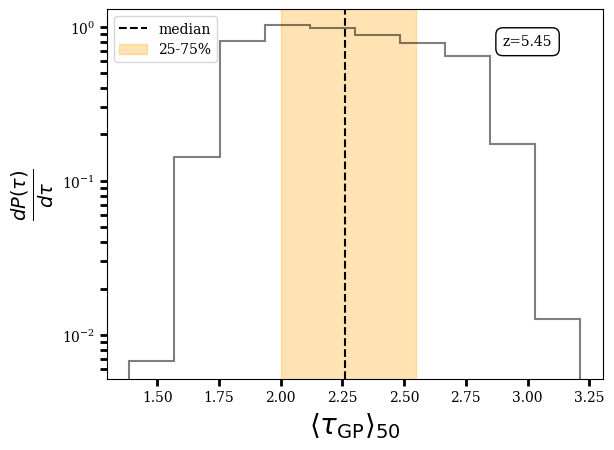

In [90]:
#log, normalized, cdf = .1, quantizied
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.1).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.tick_params(axis='both', which='both', length=5, width=2, labelsize=10)

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation, xy=(3, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')

tau_1 = np.array(tau_1)

q25 = np.quantile(tau_1, 0.25)
q50 = np.quantile(tau_1, 0.50)
q75 = np.quantile(tau_1, 0.75)

n, bins, patches = plt.hist(tau_1, bins=10, density=True, histtype='step', color='blue', alpha=0.5,edgecolor='black', linewidth=1.5)
plt.axvline(np.median(tau_1),linestyle='--',color='black',label='median')
min_tau = np.min(tau_1)
max_tau = np.max(tau_1)

plt.fill_betweenx([0, max(n)+.3], q25, q75, color='orange', alpha=0.3, label='25-75%')

plt.yscale('log')

plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.legend(loc='upper left')
plt.ylim([0,1.3])
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\517098549.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


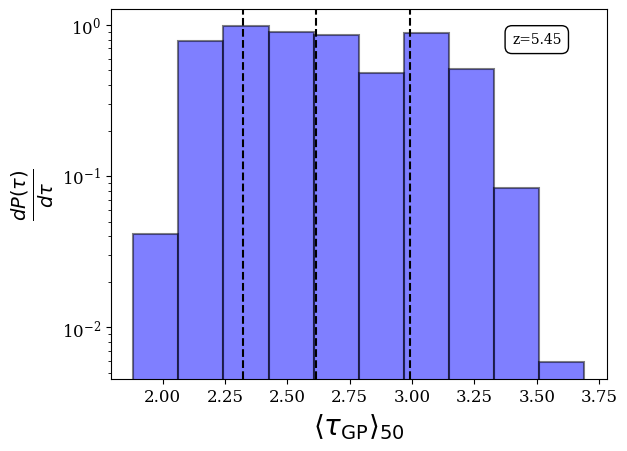

In [33]:
#log, normalized, cdf = .5
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.5).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 

plt.annotate(combined_annotation, xy=(3.5, .8), 
             bbox=bbox_props, ha='center', va='center')
tau_1 = np.array(tau_1)
plt.hist(tau_1, bins=10, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)
plt.yscale('log')
plt.axvline(x=np.quantile(tau_1,.25),color = 'black',linestyle='--',label='25%')
plt.axvline(x=np.quantile(tau_1,.50),color='black',linestyle='--',label='50%')
plt.axvline(x=np.quantile(tau_1,.75),color='black',linestyle='--',label='50%')
plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\1399544406.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))
C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\1399544406.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,1.3])


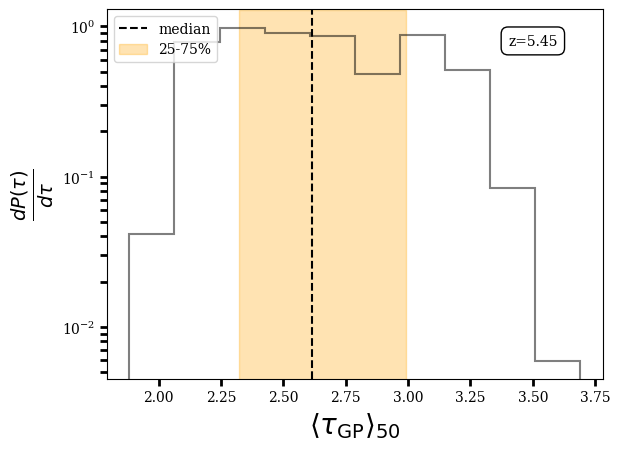

In [92]:
#log, cdf = .5, normalized, quantizies
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.5).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.tick_params(axis='both', which='both', length=5, width=2, labelsize=10)

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation, xy=(3.5, .8),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')

tau_1 = np.array(tau_1)

q25 = np.quantile(tau_1, 0.25)
q50 = np.quantile(tau_1, 0.50)
q75 = np.quantile(tau_1, 0.75)

n, bins, patches = plt.hist(tau_1, bins=10, density=True, histtype='step', color='blue', alpha=0.5,edgecolor='black', linewidth=1.5)
plt.axvline(np.median(tau_1),linestyle='--',color='black',label='median')
min_tau = np.min(tau_1)
max_tau = np.max(tau_1)

plt.fill_betweenx([0, max(n)+.3], q25, q75, color='orange', alpha=0.3, label='25-75%')

plt.yscale('log')

plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.legend(loc='upper left')
plt.ylim([0,1.3])
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\3500271598.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


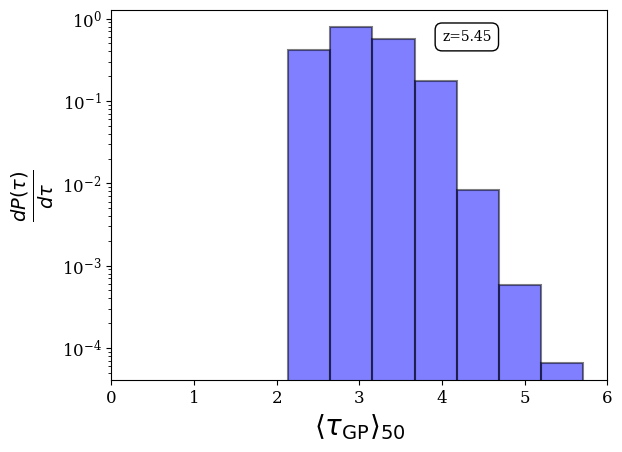

In [15]:
#log, normalized, cdf = .9
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.9).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 

plt.annotate(combined_annotation, xy=(4.3, .6), 
             bbox=bbox_props, ha='center', va='center')
tau_1 = np.array(tau_1)
plt.hist(tau_1, bins=10, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)
plt.yscale('log')
plt.xlim([0,6])
plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.show()

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\2352912472.py:5: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))
C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\2352912472.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,1.3])


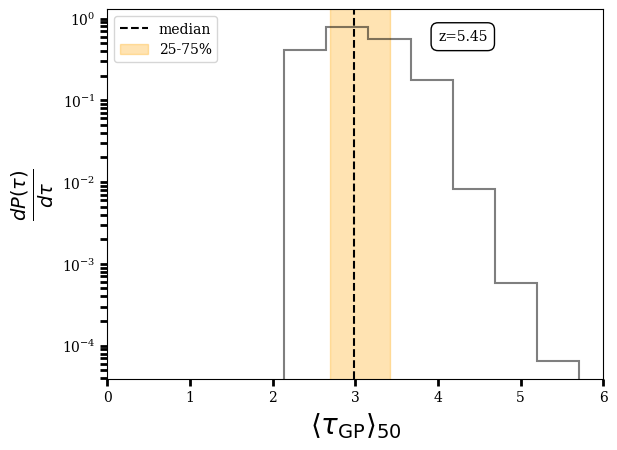

In [95]:
#log, normalized, cdf = .9, quantizied
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.9).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.tick_params(axis='both', which='both', length=5, width=2, labelsize=10)

bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
combined_annotation = r'z=5.45' 
plt.annotate(combined_annotation,xy=(4.3, .6),  # Adjust xy position as needed
             bbox=bbox_props, ha='center', va='center')

tau_1 = np.array(tau_1)

q25 = np.quantile(tau_1, 0.25)
q50 = np.quantile(tau_1, 0.50)
q75 = np.quantile(tau_1, 0.75)

n, bins, patches = plt.hist(tau_1, bins=10, density=True, histtype='step', color='blue', alpha=0.5,edgecolor='black', linewidth=1.5)
plt.axvline(np.median(tau_1),linestyle='--',color='black',label='median')
min_tau = np.min(tau_1)
max_tau = np.max(tau_1)

plt.fill_betweenx([0, max(n)+1], q25, q75, color='orange', alpha=0.3, label='25-75%')

plt.yscale('log')

plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
plt.legend(loc='upper left')
plt.xlim([0,6])
plt.ylim([0,1.3])
plt.show()

## Practice with Quantiles

C:\Users\eawer\AppData\Local\Temp\ipykernel_3840\89332362.py:4: RuntimeWarning: divide by zero encountered in log
  tau = -np.log(np.array(first_row))


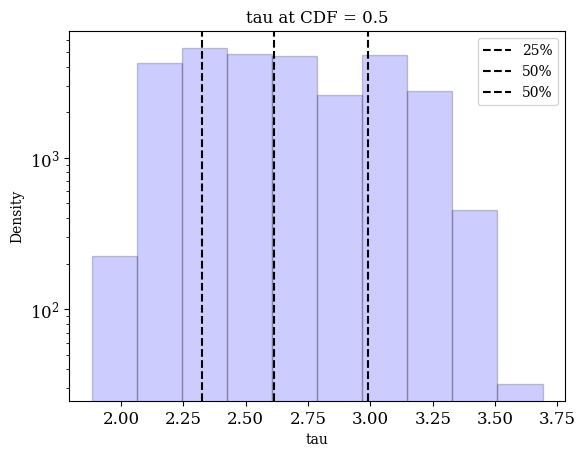

2.323910879708798


In [32]:
tau_1 = [] 
for i in df:
    first_row = i.iloc[0] 
    tau = -np.log(np.array(first_row))
    tau_sort = np.sort(tau)
    index_1 = np.abs(np.array(one) - 0.5).argmin()
    tau_1_value = tau_sort[index_1]
    tau_1.append(tau_1_value)

plt.hist(tau_1, bins=10, color='blue', alpha=0.2, edgecolor='black')
plt.xlabel('tau')
plt.ylabel('Density')
plt.yscale('log')
tau_2 = np.array(tau_1)
plt.axvline(x=np.quantile(tau_2,.25),color = 'black',linestyle='--',label='25%')
plt.axvline(x=np.quantile(tau_2,.50),color='black',linestyle='--',label='50%')
plt.axvline(x=np.quantile(tau_2,.75),color='black',linestyle='--',label='50%')
plt.title('tau at CDF = 0.5')
plt.legend()
plt.show()
mean = np.mean(tau_1)
var = np.var(tau_1)
quant = np.quantile(tau_1,.25)
print(quant)